In [1]:
1+1 # removed 

2

In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(project_root)

print("project root folder added to path",project_root)

project root folder added to path c:\Projects\automated-research-report-generation


In [2]:
from research_and_analyst.utils.model_loader import ModelLoader

In [3]:
model_loader = ModelLoader()

{"timestamp": "2026-01-03T15:18:24.634713Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2026-01-03T15:18:24.635712Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2026-01-03T15:18:24.636578Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2026-01-03T15:18:24.636578Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2026-01-03T15:18:24.636578Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2026-01-03T15:18:24.639894Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2026-01-03T15:18:24.641933Z", "level": "info", "event": "YAML config loaded"}


In [4]:
llm = model_loader.load_llm()

{"provider": "openai", "model": "gpt-4o", "timestamp": "2026-01-03T15:18:26.804534Z", "level": "info", "event": "Loading LLM"}


In [4]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field


In [5]:
llm.invoke("Hi").content

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'Hello! How can I assist you today?'

In [7]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

from langgraph.graph import StateGraph,START,END
from langchain_core.messages import AIMessage,HumanMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [11]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst")
    role: str = Field(description="Role of the analyst")
    affiliation: str = Field(description="Affiliation of the analyst")
    description: str = Field(description="Description of the analyst's research interests")

    @property
    def persona(self) -> str:
        return f"Name:{self.name}\n Role: {self.role} \n Affliation: {self.affiliation} \n Description: {self.description} \n"
    

In [12]:
analyst = Analyst(  
    name="Dr. Siva Kumar",
    role="Data Scientist",
    affiliation="IIT Madras",
    description="Focuses on predictive models for healthcare data."
)

In [13]:
print(analyst.persona)

Name:Dr. Siva Kumar
 Role: Data Scientist 
 Affliation: IIT Madras 
 Description: Focuses on predictive models for healthcare data. 



In [10]:
#analyist belongs to health industry
Analyst(
    name="Dr. Neha Patel",
    role="Medical Data Scientist",
    affiliation="Standford UNiversity",
    description="Focuses on predictive models for patient outcomes."
),
Analyst(
    name="Dr. Arun Varma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explore ethical implications of AI in diagnostics"
),
Analyst(
    name="Dr. Priya Sharma",
    role="Policy Analyst",
    affiliation="MInistry of hralth",
    description="Investigates AI Policy compliance frameworks."
)


Analyst(name='Dr. Priya Sharma', role='Policy Analyst', affiliation='MInistry of hralth', description='Investigates AI Policy compliance frameworks.')

In [14]:
class Persprective(BaseModel):
    analysts: List[Analyst] = Field(description="comprehensive list of analysts with their roles and affliations.")
    

In [15]:
class GenerateAnlystsState(TypedDict):
    topic:str
    max_analyst:int
    human_analyst_feedback: str
    analysts: List[Analyst]
    

In [18]:
GenerateAnlystsState(
    topic="finance",
    max_analyst=5,
    human_analyst_feedback="give the real infof"
)

{'topic': 'finance',
 'max_analyst': 5,
 'human_analyst_feedback': 'give the real infof'}

In [19]:
Analyst(
    name="Dr. Neha Patel",
    role="Medical Data Scientist",
    affiliation="Standford UNiversity",
    description="Focuses on predictive models for patient outcomes."
)

Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Standford UNiversity', description='Focuses on predictive models for patient outcomes.')

In [22]:
analyst_instructions="""
You are tasked with creating a set of AI analyst personas. Follow these instructions carefully.
1. First , review the research topic:
{topic}
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts:
{human_analyst_feedback}
3. Determine the most intresting themes based upon documents and /or feedback above.
4. Pick the top {max_analyst} themes.
5. Assign one analyst to each theme.
"""

In [23]:
print([analyst_instructions.format(
    topic="education",
    max_analyst=5,
    human_analyst_feedback="give the real infof"
)] +["Generate the set of analysts."])

['\nYou are tasked with creating a set of AI analyst personas. Follow these instructions carefully.\n1. First , review the research topic:\neducation\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts:\ngive the real infof\n3. Determine the most intresting themes based upon documents and /or feedback above.\n4. Pick the top 5 themes.\n5. Assign one analyst to each theme.\n', 'Generate the set of analysts.']


In [24]:
def create_analyst(state: GenerateAnlystsState):
    """It is creating my analyst"""
    topic=state["topic"]
    max_analyst = state["max_analyst"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    strctured_llm = llm.with_structured_output(Persprective)
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analyst=max_analyst,
        human_analyst_feedback=human_analyst_feedback
    )
    analysts = strctured_llm.invoke([SystemMessage(content=system_messages),HumanMessage(content="Generate the set of analysts.")])
    return {"analysts": analysts.analysts}


In [25]:
create_analyst({
    "topic":"health",
    "max_analyst":5,
    "human_analyst_feedback":"give the real infof"
})

{'analysts': [Analyst(name='Dr. Emily Carter', role='Lead Epidemiologist', affiliation='World Health Organization (WHO)', description='Specializes in global health trends, infectious disease modeling, and public health interventions.'),
  Analyst(name='Dr. James Lee', role='Healthcare Policy Analyst', affiliation='Center for Health Policy Research', description='Focuses on healthcare policy, health economics, and healthcare access and affordability.'),
  Analyst(name='Dr. Maria Rodriguez', role='Medical Technology Innovator', affiliation='National Institutes of Health (NIH)', description='Dedicated to medical technology, digital health, and the development of innovative diagnostic and therapeutic tools.'),
  Analyst(name='Dr. David Chen', role='Mental Health Specialist', affiliation='American Psychiatric Association', description='Expertise in mental health, behavioral health, and the impact of social determinants on mental well-being.'),
  Analyst(name='Dr. Sarah Brown', role='Nutriti

In [26]:
def human_feeback(state):
    """ feedback"""
    pass

def should_continue(state):
    """ArithmeticErrorstate"""
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["","none","skip","done","continue"]:
        return "create_analyst"
    return END



In [27]:

from IPython.display import Image, display

In [14]:
from IPython.display import Image, display

In [28]:
builder = StateGraph(GenerateAnlystsState)

In [29]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feeback", human_feeback)
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feeback")

builder.add_conditional_edges(
    "human_feeback",should_continue,
    ["create_analyst",END]
)

In [30]:
memory = MemorySaver()

In [32]:
graph = builder.compile(interrupt_before=["human_feeback"], checkpointer=memory)

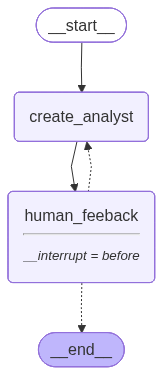

In [33]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [34]:
topic="the benifit of adopting Langgraph as an agent framework"

In [35]:
max_analyst=5

In [41]:
thread = {"configurable": {"thread_id": "1"}}

In [47]:
for event in graph.stream({"topic": topic, "max_analyst": max_analyst}, thread, stream_mode="values"):
    analysts1 = event.get("analyst","")
    print("before if block")
    if analysts1:
        for analyst in analysts1:
            print("in for loop")
            print(f"Name: {analyst.name}")
            print(f"Role: {analyst.role}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Description: {analyst.description}")
            print("---")

before if block
before if block


In [52]:
from dotenv import load_dotenv
load_dotenv()

True

In [53]:
import os
key = os.getenv("TAVILY_API_KEY")

In [54]:
print(key)

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


In [63]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_search = TavilySearchResults()

In [64]:
tavily_search.invoke("langgraph")

[{'title': 'What is LangGraph? - GeeksforGeeks',
  'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
  'content': 'LangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models (LLMs) with graph-based architectures allowing developers to map, organize and optimize how AI agents interact and make decisions.',
  'score': 0.9294982},
 {'title': 'LangGraph overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents. LangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the component

In [65]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="Langgraph", load_max_docs=2).load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 
